# Projet methodo: premiers pas


## Importation des packages nécessaires :

In [15]:
import tensorflow as tf
print(tf.__version__)

!pip install tslearn
!pip install keras_core

2.14.0


In [23]:
import tslearn # pour les séries
from tslearn.datasets import UCR_UEA_datasets
import keras_core as keras
from keras.models import Sequential, Model
from keras.layers import Dense, InputLayer, SimpleRNN, Input
!pip install aeon
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
'''from aeon.datasets import load_classification
X, y, meta_data = load_classification("GunPoint")
print(" Shape of X = ", X.shape)
print(" Meta data = ", meta_data)'''


'from aeon.datasets import load_classification\nX, y, meta_data = load_classification("GunPoint")\nprint(" Shape of X = ", X.shape)\nprint(" Meta data = ", meta_data)'

In [ ]:
'''#Type image
data_loader = UCR_UEA_datasets()

X_train, y_train, X_test, y_test = data_loader.load_dataset("Adiac")
print("Shape of X_train:", X_train.shape)'''

'#Type image\ndata_loader = UCR_UEA_datasets()\n\nX_train, y_train, X_test, y_test = data_loader.load_dataset("Adiac")\nprint("Shape of X_train:", X_train.shape)'

## Importation des données :

In [11]:
#pour type de data simulted
data_loader = UCR_UEA_datasets()

x_train, y_train, x_test, y_test = data_loader.load_dataset("TwoPatterns")

print("Shape of X_train:", x_train.shape)
#Shape of X_train: (1000, 128, 1) : On dispose de 1000 séries temporelles dans notre ensemble de données d'entraînement. Chaque série temporelle a une longueur de 128, ET une seule variable;
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Shape of X_train: (1000, 128, 1)
(4000, 128, 1)
(1000,)
(4000,)


In [10]:

#nique_classes = np.unique(y_train)
#num_classes = len(unique_classes)
#num_classes


unique_classes_train = np.unique(y_train)
unique_classes_test = np.unique(y_test)
print("Classes uniques dans y_train :", unique_classes_train)
print("Classes uniques dans y_test :", unique_classes_test)


Classes uniques dans y_train : [1 2 3 4]
Classes uniques dans y_test : [1 2 3 4]


Avnat de pouvoir mettre nos données dans le réseau, il va falloir les encoder en utilisant la méthode one hot encoding, ou chaque classe est représenté par un vecteur 1xn_classes . Le vecteur est composé de 0 et de 1 uniquement. Par exemple la première classe peut etre représentée par (1,0,0,0)

In [12]:
#La fonction to_categorical de Keras par défaut ajoute une colonne supplémentaire par rapport au nombre de classes réelles pour représenter les classes.
num_classes = 4
y_train = to_categorical(y_train - 1, num_classes=num_classes)
y_test = to_categorical(y_test - 1, num_classes=num_classes)


In [18]:
print(y_train.shape)
print(x_train.shape)
print(x_train[0])

(1000, 4)
(1000, 128, 1)
[[ 0.2303793 ]
 [ 0.49096649]
 [ 0.35883306]
 [-0.23096511]
 [ 0.09022479]
 [-0.50147326]
 [-0.33932938]
 [ 0.06683648]
 [ 0.23294938]
 [ 0.0283255 ]
 [ 0.23170201]
 [ 0.01658709]
 [ 0.14365201]
 [ 0.28534305]
 [ 0.07138283]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [-1.6801291 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [ 1.6600859 ]
 [-0.16328428]
 [ 0.09686659]
 [-0.6035321 ]
 [ 0.25774259]
 [-0.14132001]
 [-0.29348153]
 [-0.43528911]
 [ 0.409104  ]
 [ 0.87897646]
 [ 0.4880588 ]
 [ 0.05181855]
 [ 0.38952406]
 [ 0.3077399 ]
 [ 0.50258019]
 [ 0.05401077]
 [-0.23488537]
 [ 0.16741434]
 [ 0.52881961]
 [-0.26021885]
 [ 0.23290647]
 [ 0.5161471 ]
 [ 0.0868569 ]
 [-0.14512941]
 [-0.91453742]
 [-0.14174021]


On peut visulaiser la première série d'entrainement X_train[0] (A refaire, la visualisation à un problème)

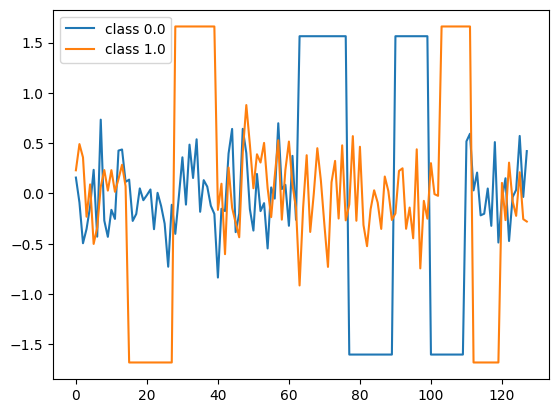

In [14]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()

# Parcourir les classes uniques
for c in classes:
    indices = np.where(np.argmax(y_train, axis=1) == c)[0]
    c_x_train = x_train[indices]
    plt.plot(c_x_train[0], label="class " + str(c))


plt.legend(loc="best")
plt.show()
plt.close()


Dans la partie suivante nous allons créer et tester divers modèles avec le jeu de données. Pour commencer nous proposons:

* Un modèle séquentiel simple sans hidden layer
* Un modèle séquentiel avec plusieurs hidden layers
* Un modèle Récurrent simple

Nous testerons ces trois modèles avec différentes méthodes d'optimisation.



## Définition des modèles:

In [32]:
model_simple = Sequential([
    InputLayer(input_shape=(128,)),
    Dense(units=4, activation="softmax")
])

# fonction de coût en classif : l'entropie croisée :
# somme -log(P(y=yi|xi))
# model.count_params()
# model.compile(optimizer="sgd", loss="categorical_crossentropy",metrics=["accuracy"])

model_3h = Sequential([
    InputLayer(input_shape=(128,)),
    Dense(units=256, activation="relu"),
    Dense(units=256, activation="relu"),
    Dense(units=256, activation="sigmoid"),
    Dense(units=4, activation="softmax")
])

def make_model_rnn(tslength):
    input_layer = Input(shape=(tslength,1))
    srnn1 = SimpleRNN(64, return_sequences=False)(input_layer)
    output_layer = Dense(units=4, activation="softmax")(srnn1)
    model = Model(input_layer, output_layer)
    return model

model_rnn = make_model_rnn(128)

model_list = [model_simple, model_3h, model_rnn]
optimizers = ["sgd", "Adam"]

In [35]:
def test_models(model_list, optimizers, x_train, y_train, x_test, y_test):
  results = []
  for i in range(len(model_list)):
    histories = {}
    model = model_list[i]
    for optimizer in optimizers:
      print(f"model {i+1}")
      model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
      hist = model.fit(x=x_train, y=y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test)).history
      histories[optimizer] = hist
    results.append(histories)
  return results


In [36]:
results = test_models(model_list, optimizers, x_train, y_train, x_test, y_test)

model 1
Epoch 1/20
100/100 [==============================] - 1s 10ms/step - loss: 0.2796 - accuracy: 0.9210 - val_loss: 0.4375 - val_accuracy: 0.8225
Epoch 2/20
100/100 [==============================] - 2s 15ms/step - loss: 0.2762 - accuracy: 0.9280 - val_loss: 0.4374 - val_accuracy: 0.8245
Epoch 3/20
100/100 [==============================] - 2s 16ms/step - loss: 0.2753 - accuracy: 0.9240 - val_loss: 0.4357 - val_accuracy: 0.8265
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 0.2734 - accuracy: 0.9240 - val_loss: 0.4340 - val_accuracy: 0.8270
Epoch 5/20
100/100 [==============================] - 1s 8ms/step - loss: 0.2712 - accuracy: 0.9230 - val_loss: 0.4316 - val_accuracy: 0.8265
Epoch 6/20
100/100 [==============================] - 1s 7ms/step - loss: 0.2698 - accuracy: 0.9270 - val_loss: 0.4320 - val_accuracy: 0.8248
Epoch 7/20
100/100 [==============================] - 1s 8ms/step - loss: 0.2676 - accuracy: 0.9270 - val_loss: 0.4315 - val_accuracy: 0.

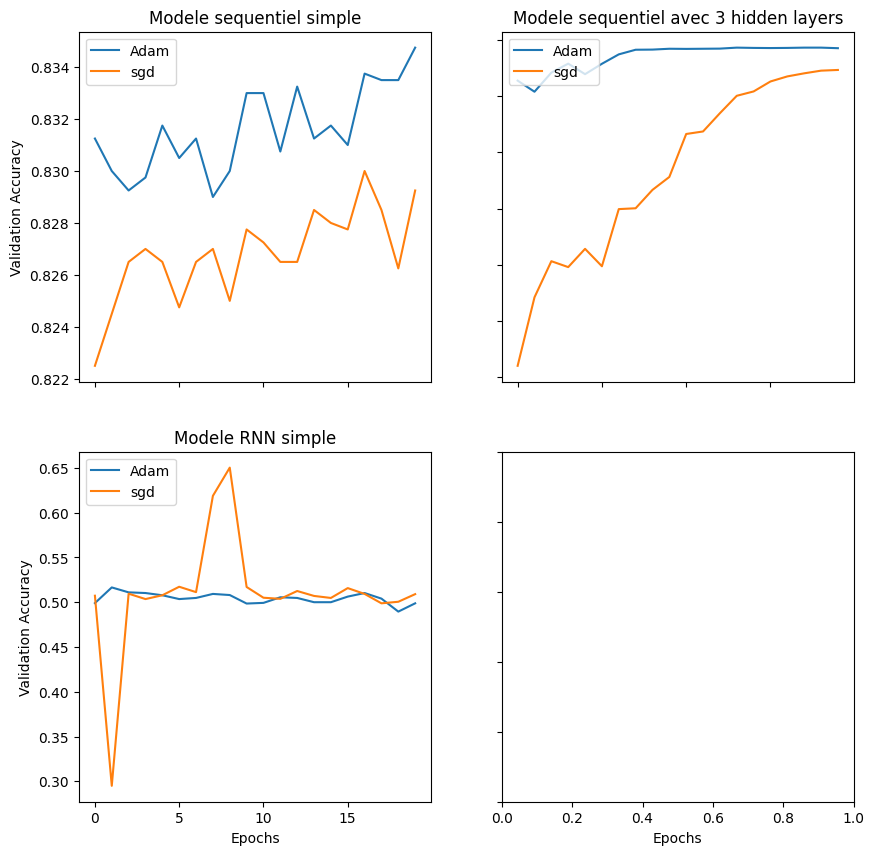

In [44]:

fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(results[0]["Adam"]["val_accuracy"])
axs[0, 0].plot(results[0]["sgd"]["val_accuracy"])
axs[0, 0].set_title('Modele sequentiel simple')
axs[0,0].legend(["Adam", "sgd"], loc="upper left")
axs[0, 1].plot(results[1]["Adam"]["val_accuracy"])
axs[0, 1].plot(results[1]["sgd"]["val_accuracy"])
axs[0, 1].set_title('Modele sequentiel avec 3 hidden layers')
axs[0,1].legend(["Adam", "sgd"], loc="upper left")
axs[1, 0].plot(results[2]["Adam"]["val_accuracy"])
axs[1, 0].plot(results[2]["sgd"]["val_accuracy"])
axs[1, 0].set_title('Modele RNN simple')
axs[1,0].legend(["Adam", "sgd"], loc="upper left")


for ax in axs.flat:
    ax.set(xlabel='Epochs', ylabel="Validation Accuracy")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()